In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# from statannot import add_stat_annotation
import numpy as np
from statannotations.Annotator import Annotator
import sctools as sct
import scanpy as sc
plt.style.use('meth.mplstyle')

/home/jupyter/miniconda3/envs/scDNAm/lib/python3.10/site-packages/google/cloud/storage/transfer_manager.py:30: UserWarning: The module `transfer_manager` is a preview feature. Functionality and API may change. This warning will be removed in a future release.
  warnings.warn(


In [2]:
def plot_pval(p):
    if p < 1e-4:
        return '<0.0001'
    elif p < 1e-3:
        return '<0.001'
    elif p < 1e-2:
        return '<0.01'
    else:
        return f'={p:.2f}'

In [3]:
ad = sct.io.read_adata('gs://retro-personal-andrei/scDNAm/scDNAm/data/GSE121364/GSE121364.h5ad')
ad.obs.loc[ad.obs['Age'].isna(), 'Age'] = '2 months'
ad

ℹ️ File exists in cache. Using cached file.
ℹ️ You can now replace your function call with the following for reproducibility:
uget('gs://retro-personal-andrei/scDNAm/scDNAm/data/GSE121364/GSE121364.h5ad', checksum='TsoontGdhuGEr+kHrrGO1A==')


AnnData object with n_obs × n_vars = 377 × 25952
    obs: 'Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample', 'Bytes', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'Experiment', 'GEO_Accession (exp)', 'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism', 'Platform_x', 'ReleaseDate', 'Sample Name', 'SRA Study', 'Age', 'Cell_type', 'Mouse_ID', 'source_name', 'STRAIN', 'Accession', 'Title', 'Sample Type', 'Taxonomy', 'Channels', 'Platform_y', 'Series', 'Supplementary Types', 'Supplementary Links', 'SRA Accession', 'Contact', 'Release Date'
    var: 'chr', 'start'

In [4]:
df_genes = pd.read_csv('orrs/Aggregated_by_genes_CpG2gene_table_minus_strand_proper_genes_at_least_3_CpGs_v3.csv', index_col=0)
# df_genes = pd.read_csv('orrs/Aggregated_by_genes_CpG2gene_table_plus_strand_proper_genes_at_least_3_CpGs_v3.csv')
df_genes.head()

,0.1_Num_of_CpGs_around,0.1_Num_of_CoReg_CpGs_around,0.1_Num_of_Stoch_CpGs_around,0.1_Num_of_Random_CpGs_around,0.2_Num_of_CpGs_around,0.2_Num_of_CoReg_CpGs_around,0.2_Num_of_Stoch_CpGs_around,0.2_Num_of_Random_CpGs_around,0.3_Num_of_CpGs_around,0.3_Num_of_CoReg_CpGs_around,...,0.6_Fraction_of_Random,0.7_Fraction_of_CoReg,0.7_Fraction_of_Stoch,0.7_Fraction_of_Random,0.8_Fraction_of_CoReg,0.8_Fraction_of_Stoch,0.8_Fraction_of_Random,0.9_Fraction_of_CoReg,0.9_Fraction_of_Stoch,0.9_Fraction_of_Random
geneName,,,,,,,,,,,,,,,,,,,,,
Lrriq1,5.0,4.0,0.0,1.0,5.0,4.0,0.0,1.0,5.0,3.0,...,0.200000,0.0,0.800000,0.200000,0.0,0.800000,0.200000,0.0,0.800000,0.200000
Tmtc2,5.0,2.0,1.0,2.0,5.0,2.0,1.0,2.0,5.0,2.0,...,0.400000,0.0,0.600000,0.400000,0.0,0.600000,0.400000,0.0,0.600000,0.400000
Otogl,5.0,2.0,1.0,2.0,5.0,2.0,1.0,2.0,5.0,0.0,...,0.400000,0.0,0.600000,0.400000,0.0,0.600000,0.400000,0.0,0.600000,0.400000
Grm1,4.0,0.0,2.0,2.0,4.0,0.0,2.0,2.0,4.0,0.0,...,0.500000,0.0,0.500000,0.500000,0.0,0.500000,0.500000,0.0,0.500000,0.500000
Syt1,9.0,4.0,1.0,4.0,9.0,4.0,1.0,4.0,9.0,3.0,...,0.444444,0.0,0.555556,0.444444,0.0,0.555556,0.444444,0.0,0.555556,0.444444


In [5]:
df = df_genes[['0.4_Fraction_of_Random', '0.4_Fraction_of_CoReg', '0.4_Fraction_of_Stoch']]
ad.var = pd.concat((ad.var, df), axis=1)

In [6]:
ad_coreg = ad[:,ad.var['0.4_Fraction_of_CoReg'] > 0.5].copy()
ad_stoch = ad[:,ad.var['0.4_Fraction_of_Stoch'] > 0.5].copy()
ad_random = ad[:,ad.var['0.4_Fraction_of_Random'] > 0.5].copy()
ad_coreg, ad_stoch, ad_random

(AnnData object with n_obs × n_vars = 377 × 41
     obs: 'Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample', 'Bytes', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'Experiment', 'GEO_Accession (exp)', 'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism', 'Platform_x', 'ReleaseDate', 'Sample Name', 'SRA Study', 'Age', 'Cell_type', 'Mouse_ID', 'source_name', 'STRAIN', 'Accession', 'Title', 'Sample Type', 'Taxonomy', 'Channels', 'Platform_y', 'Series', 'Supplementary Types', 'Supplementary Links', 'SRA Accession', 'Contact', 'Release Date'
     var: 'chr', 'start', '0.4_Fraction_of_Random', '0.4_Fraction_of_CoReg', '0.4_Fraction_of_Stoch',
 AnnData object with n_obs × n_vars = 377 × 923
     obs: 'Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample', 'Bytes', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'Experiment', 'GEO_Accession (exp)', '

# Without lognormalization

In [7]:
sc.tl.pca(ad_coreg)
sc.tl.pca(ad_stoch)
sc.tl.pca(ad_random)

In [8]:
from scipy.stats import pearsonr 
X = ad_coreg.obsm['X_pca']
t = 22.*( ad_coreg.obs['Age'].values == '24 months') + 2
idx_nonan = ~np.isnan(t)
X = X[idx_nonan,:]
t = t[idx_nonan]
corrs_coreg = []

for i in range(6):
    # print(X[:,i], t)
    # print(pearsonr(X[:,i], t))
    corrs_coreg.append(pearsonr(X[:,i], t))
    print(corrs_coreg[-1])

PearsonRResult(statistic=-0.22412682653915433, pvalue=1.1163244598655325e-05)
PearsonRResult(statistic=0.05958345309590037, pvalue=0.24846522338501506)
PearsonRResult(statistic=0.0018557389302875918, pvalue=0.9713522791941653)
PearsonRResult(statistic=-0.08592238951299833, pvalue=0.09574270209691207)
PearsonRResult(statistic=-0.03356515863620283, pvalue=0.5158624910503684)
PearsonRResult(statistic=-0.05972610891418258, pvalue=0.24733229621132247)


In [9]:
from scipy.stats import pearsonr 
X = ad_stoch.obsm['X_pca']
t = 22.*( ad_stoch.obs['Age'].values == '24 months') + 2
idx_nonan = ~np.isnan(t)
X = X[idx_nonan,:]
t = t[idx_nonan]
corrs_stoch = []
for i in range(6):
    # print(X[:,i], t)
    corrs_stoch.append(pearsonr(X[:,i], t))
    print(corrs_stoch[-1])

PearsonRResult(statistic=0.015615733657472682, pvalue=0.7624887187556894)
PearsonRResult(statistic=0.31847869561226655, pvalue=2.47166481999705e-10)
PearsonRResult(statistic=0.050756957938115084, pvalue=0.3256650878321544)
PearsonRResult(statistic=-0.16798611676910685, pvalue=0.001059742925794271)
PearsonRResult(statistic=0.006921431375537853, pvalue=0.8934458909339738)
PearsonRResult(statistic=0.10112224681333487, pvalue=0.049768237357085805)


In [10]:
from scipy.stats import pearsonr 
X = ad_random.obsm['X_pca']
t = 22.*( ad_random.obs['Age'].values == '24 months') + 2
idx_nonan = ~np.isnan(t)
X = X[idx_nonan,:]
t = t[idx_nonan]
corrs_random = []
for i in range(6):
    # print(X[:,i], t)
    corrs_random.append(pearsonr(X[:,i], t))
    print(corrs_random[-1])

PearsonRResult(statistic=0.05862832264342737, pvalue=0.25614370885174753)
PearsonRResult(statistic=-0.1326225057671599, pvalue=0.009940017683419827)
PearsonRResult(statistic=-0.22794304437709995, pvalue=7.816854713425023e-06)
PearsonRResult(statistic=0.0677586646339881, pvalue=0.1892585726972776)
PearsonRResult(statistic=0.43319277553128627, pvalue=1.1203388820593352e-18)
PearsonRResult(statistic=-0.05155094131952884, pvalue=0.3181444356714865)


In [11]:
ad_coreg_v2 = ad_coreg[~ad_coreg.obs['Age'].values.isna()]
ad_stoch_v2 = ad_stoch[~ad_stoch.obs['Age'].values.isna()]
ad_random_v2 = ad_random[~ad_random.obs['Age'].values.isna()]

In [12]:
sc.tl.pca(ad_coreg_v2)
sc.tl.pca(ad_stoch_v2)
sc.tl.pca(ad_random_v2)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


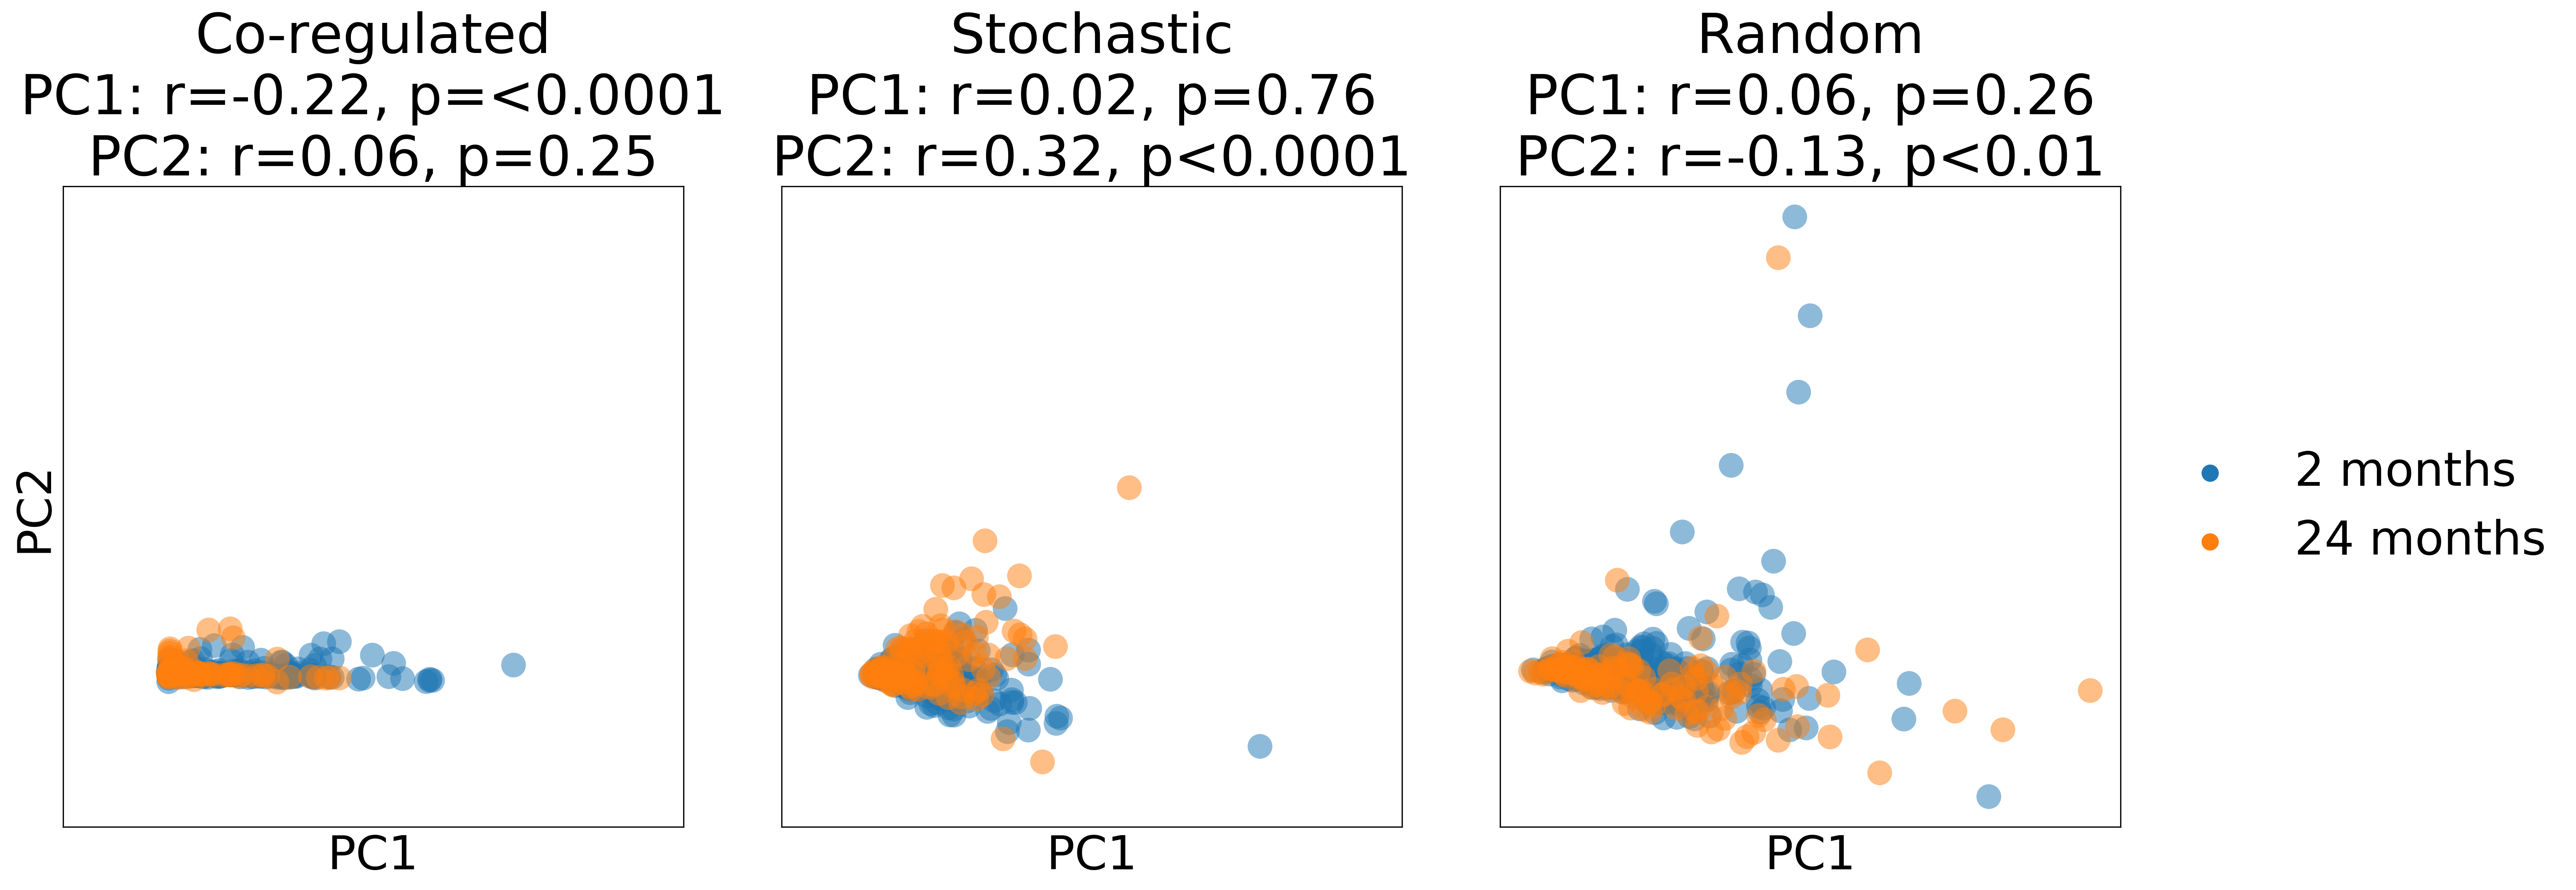

In [13]:
fig, ax = plt.subplots(1,3,dpi=300, sharex=True, sharey=True, figsize=(23,8))
i1 = 0
i2 = 1
sc.pl.pca(ad_coreg_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,
          show=False,ax=ax[0],legend_loc=None,
          title=f'Co-regulated\nPC1: r={corrs_coreg[0][0]:.2f}, p={plot_pval(corrs_coreg[i1][1])}\nPC2: r={corrs_coreg[1][0]:.2f}, p={corrs_coreg[1][1]:.2f}')
sc.pl.pca(ad_stoch_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,
          show=False,ax=ax[1],legend_loc=None,
                    title=f'Stochastic\nPC1: r={corrs_stoch[0][0]:.2f}, p{plot_pval(corrs_stoch[i1][1])}\nPC2: r={corrs_stoch[1][0]:.2f}, p{plot_pval(corrs_stoch[i2][1])}')

sc.pl.pca(ad_random_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,
          show=False,ax=ax[2],
                    title=f'Random\nPC1: r={corrs_random[0][0]:.2f}, p{plot_pval(corrs_random[i1][1])}\nPC2: r={corrs_random[1][0]:.2f}, p{plot_pval(corrs_random[i2][1])}')
# [ax[i].set_xticks(np.arange(-15, 16, 10)) for i in range(3)]
# [ax[i].set_yticks(np.arange(-12, 13, 4)) for i in range(3)]
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
plt.tight_layout(w_pad=1.05)
plt.savefig('PICS/png/age_corr_scRNAseq_nolognorm.png', dpi=300)
plt.show()

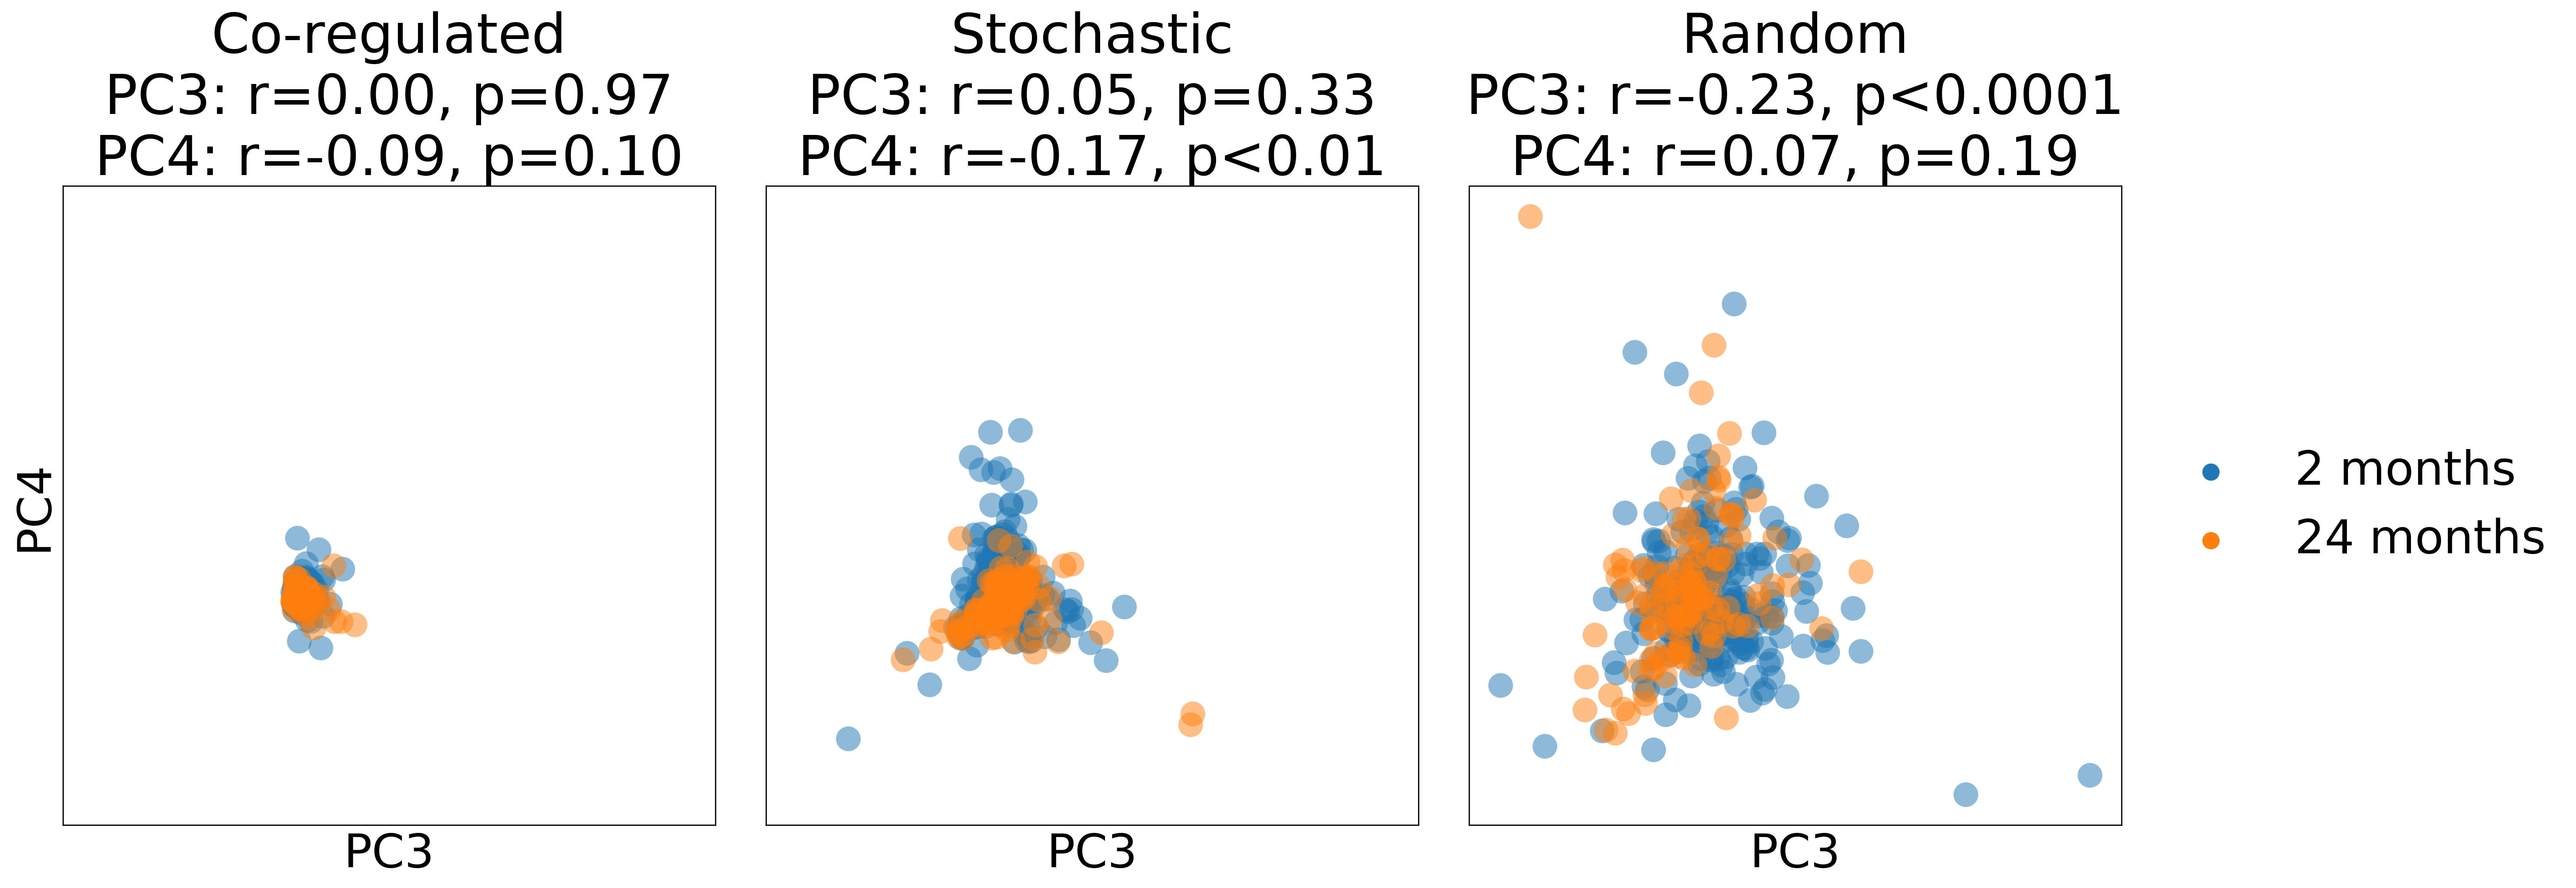

In [14]:
fig, ax = plt.subplots(1,3,dpi=300, sharex=True, sharey=True, figsize=(23,8))
i1 = 2
i2 = 3
sc.pl.pca(ad_coreg_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,components=[3,4],
          show=False,ax=ax[0],legend_loc=None,
          title=f'Co-regulated\nPC{i1+1}: r={corrs_coreg[i1][0]:.2f}, p={corrs_coreg[i1][1]:.2f}\nPC{i2+1}: r={corrs_coreg[i2][0]:.2f}, p={corrs_coreg[i2][1]:.2f}')
sc.pl.pca(ad_stoch_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,components=[3,4],
          show=False,ax=ax[1],legend_loc=None,
                    title=f'Stochastic\nPC{i1+1}: r={corrs_stoch[i1][0]:.2f}, p{plot_pval(corrs_stoch[i1][1])}\nPC{i2+1}: r={corrs_stoch[i2][0]:.2f}, p{plot_pval(corrs_stoch[i2][1])}')

sc.pl.pca(ad_random_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,components=[3,4],
          show=False,ax=ax[2],
                    title=f'Random\nPC{i1+1}: r={corrs_random[i1][0]:.2f}, p{plot_pval(corrs_random[i1][1])}\nPC{i2+1}: r={corrs_random[i2][0]:.2f}, p{plot_pval(corrs_random[i2][1])}')
# [ax[i].set_xticks(np.arange(-15, 16, 10)) for i in range(3)]
# [ax[i].set_yticks(np.arange(-12, 13, 4)) for i in range(3)]
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
plt.tight_layout(w_pad=1.05)
plt.savefig('PICS/png/age_corr_scRNAseq_PC34_nolognorm.png', dpi=300)
plt.show()

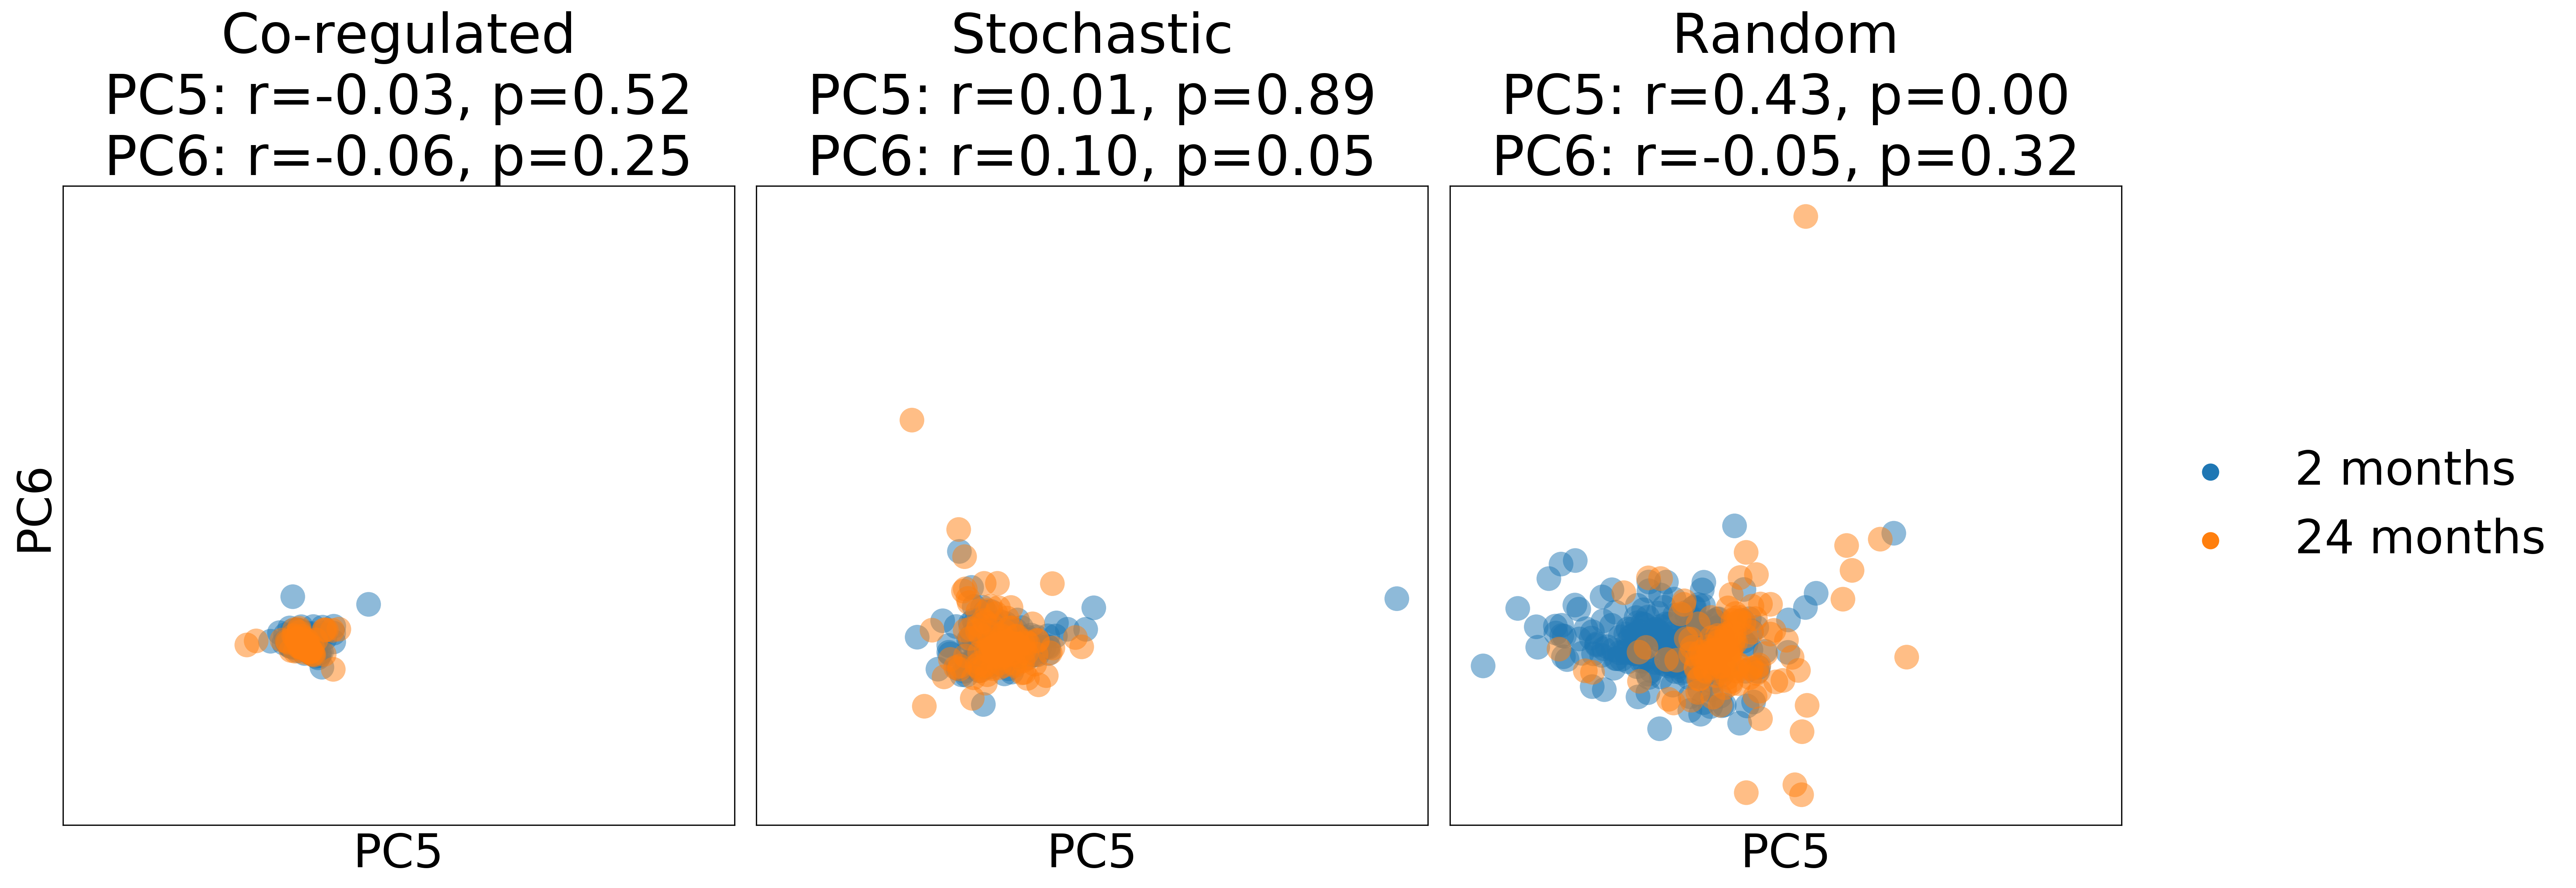

In [15]:
fig, ax = plt.subplots(1,3,dpi=300, sharex=True, sharey=True, figsize=(23,8))
i1 = 4
i2 = 5
sc.pl.pca(ad_coreg_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,components=[5,6],
          show=False,ax=ax[0],legend_loc=None,
          title=f'Co-regulated\nPC{i1+1}: r={corrs_coreg[i1][0]:.2f}, p={corrs_coreg[i1][1]:.2f}\nPC{i2+1}: r={corrs_coreg[i2][0]:.2f}, p={corrs_coreg[i2][1]:.2f}')
sc.pl.pca(ad_stoch_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,components=[5,6],
          show=False,ax=ax[1],legend_loc=None,
                    title=f'Stochastic\nPC{i1+1}: r={corrs_stoch[i1][0]:.2f}, p={corrs_stoch[i1][1]:.2f}\nPC{i2+1}: r={corrs_stoch[i2][0]:.2f}, p={corrs_stoch[i2][1]:.2f}')

sc.pl.pca(ad_random_v2, color=['Age'], cmap='RdYlGn',alpha=0.5,s=1000,components=[5,6],
          show=False,ax=ax[2],
                    title=f'Random\nPC{i1+1}: r={corrs_random[i1][0]:.2f}, p={corrs_random[i1][1]:.2f}\nPC{i2+1}: r={corrs_random[i2][0]:.2f}, p={corrs_random[i2][1]:.2f}')
# [ax[i].set_xticks(np.arange(-15, 16, 10)) for i in range(3)]
# [ax[i].set_yticks(np.arange(-12, 13, 4)) for i in range(3)]
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
plt.tight_layout(w_pad=1.05)
plt.savefig('PICS/png/age_corr_scRNAseq_PC56_nolognorm.png', dpi=300)
plt.show()